<a href="https://colab.research.google.com/github/gmlessa/dados-enem-valparaiso/blob/main/Gustavo_Meireles_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Valparaíso de Goiás - introdução e objetivos

Valparaíso de Goiás, Goiás, é uma cidade localizada a aproximadamente a 30 km da capital brasileira, Brasília. Foi fundada oficialmente em 15 de junho de 1995, conta com aproximadamente com 159.500 habitantes (2017) e uma área de 61.450 km². Por conta da proximidade com a capital, Valparaíso é uma cidade que cresce bastante a cada ano e tem um potencial de desenvolvimento muito alto. (1)

Pelo fato de estar próximo a Brasília e a economia da cidade ser muito voltada a comércio e trabalho informal (40% da base de trabalhadores, segundo o site da prefeitura), grande parte da população trabalha em Brasília para ter condições financeiras melhores, já que a média salarial segundo o Instituto Brasileiro de Geografia e Estatística (IBGE) é de 2 salários mínimos. (1)

O Exame Nacional do Ensino Médio (ENEM), avalia o desempenho escolar do final da educação básica no Brasil e também serve de porta de entrada para o ensino superior através dos programas públicos Sisu e Prouni. A prova é aplicada em dois domingos e os participantes fazem provas de linguagens e códigos, ciências humanas, ciências da natureza, matemática e por fim, tem que escrever uma redação a partir de um tema fornecido pela banca examinadora. E este ano, será aplicado pela primeira vez de forma digital, por conta do contexto da epidemia de COVID-19. (2)

Segundo o IBGE, Valparaíso de Goiás ocupa a posição de 186º lugar no rank de educação no estado de Goiás de 246 municípios. E, no ano de 2019, Valparaíso de Goiás teve 5909 matriculados alunos no ensino médio, contando com 410 docentes para ensiná-los e poderem prepara os alunos para o ENEM. (1) 

Com base nos dados disponibilizados pelo INEP sobre o ENEM 2019, este projeto tem como objetivo demonstrar o desempenho dos alunos na prova e dessa forma, mostrar como está o panorama educacional da cidade, podendo servir de base para estudos futuros e até tomada de ações para melhorar a educação.

Para os estudos, os estudantes considerados de Valparaíso de Goiás são os estudantes que colocaram na sua inscrição, o município residência como "Valparaíso de Goiás".

## Importando a base de dados e as bibliotecas a serem trabalhadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Arquivo .txt para trabalhar com o estado de GO foi disponibilizado em: 
#https://www.kaggle.com/dataset/eeebf2b4e3352e5ae3bbc7f985dd1edd7e11904a687431737859b3bd8f93cc64

#Criando variavel para transformar o arquivo .txt
read_file = pd.read_csv (r'/content/drive/My Drive/Colab Notebooks/Selec_GO.txt')

#Transformando o arquivo .txt em .csv
read_file.to_csv (r'/content/drive/My Drive/Colab Notebooks/Selec_GO.csv', index=None)

In [ ]:
#Lendo o arquivo .csv
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Selec_GO.csv', sep=';')

In [ ]:
#Criando coluna de nota total(incluindo redação)

provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

In [ ]:
#Selecionando os dados para trabalhar somente com Valparaíso de Goiás
dados_valparaiso = dados.query("NO_MUNICIPIO_RESIDENCIA == 'Valparaíso de Goiás'")

In [ ]:
##Observando o número de participantes que residem em Valparaíso de Goiás
dados_valparaiso.count()

ID                         4812
 NU_INSCRICAO              4812
NU_ANO                     4812
CO_MUNICIPIO_RESIDENCIA    4812
NO_MUNICIPIO_RESIDENCIA    4812
                           ... 
Q022                       4812
Q023                       4812
Q024                       4812
Q025                       4812
NU_NOTA_TOTAL              4812
Length: 138, dtype: int64

## Análise exploratória dos dados - Treineiros vs Não treineiros

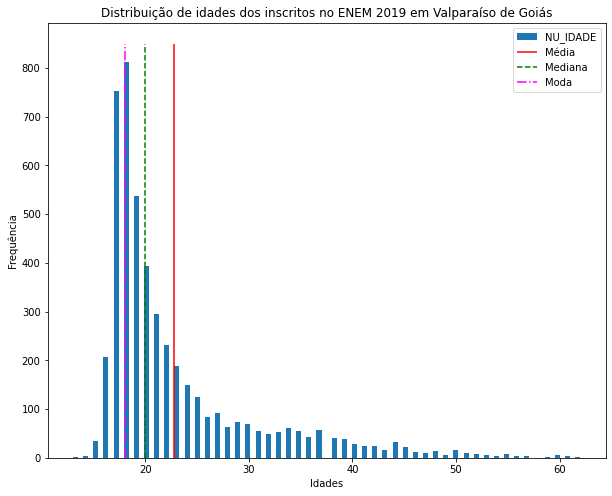

In [ ]:
#Observando a idade dos alunos que fizeram a prova em Valparaíso de Goiás
idade_valparaiso = dados_valparaiso["NU_IDADE"].sort_index()

idade_valparaiso.plot.hist(bins=100, figsize=(10,8))
plt.title("Distribuição de idades dos inscritos no ENEM 2019 em Valparaíso de Goiás")
plt.xlabel("Idades")
plt.ylabel("Frequência")
plt.vlines(idade_valparaiso.mean(), ymin = 0, ymax = 850, colors='red', linestyles='solid', label='Média', data=dados_valparaiso)
plt.vlines(idade_valparaiso.median(), ymin = 0, ymax = 850, colors='green', linestyles='dashed', label='Mediana', data=dados_valparaiso)
plt.vlines(int(idade_valparaiso.mode()), ymin = 0, ymax = 850, colors='magenta', linestyles='dashdot', label='Moda', data=dados_valparaiso)
plt.legend()

In [ ]:
print(len(dados.query("NU_IDADE <= 18")), len(dados.query("NU_IDADE > 18")))

84010 86137


In [ ]:
print(len(dados_valparaiso.query("NU_IDADE <= 18")), len(dados_valparaiso.query("NU_IDADE > 18")))

1809 3003


In [ ]:
dados_valparaiso.query("TP_ENSINO == 'NaN'")["NU_IDADE"].value_counts().sort_index()

13      1
14      3
15     33
16    166
17    147
18    181
19    253
20    231
21    154
22    115
23     98
24     84
25     76
26     45
27     49
28     38
29     40
30     46
31     33
32     31
33     36
34     41
35     29
36     22
37     35
38     24
39     25
40     14
41     12
42     16
43     10
44     20
45     12
46      4
47      4
48      8
49      3
50      9
51      7
52      6
53      5
54      2
55      7
56      2
57      3
59      1
60      4
61      2
62      2
Name: NU_IDADE, dtype: int64

Olhando a idade dos participantes, é possível inferir que a maior parte dos participantes possui mais que 18 anos de idade, como no restante do estado. O que pode indicar que vários dos estudantes que realizam o ENEM não terminou o ensino médio no tempo esperado ou que fez ensino complementar como o Ensino de Jovens e Adultos (EJA) para completar o ensino médio, já que grande parte dos inscritos que não preencheram o campo "TP_ENSINO" foram pessoas com mais de 18 anos de idade. No entanto, na base de dados do ENEM 2019, o campo que demonstraria isso tem muitos vazios, não podendo fazer qualquer tipo de conclusão a partir disso. (4)

(0.0, 100.0)

<Figure size 720x576 with 0 Axes>

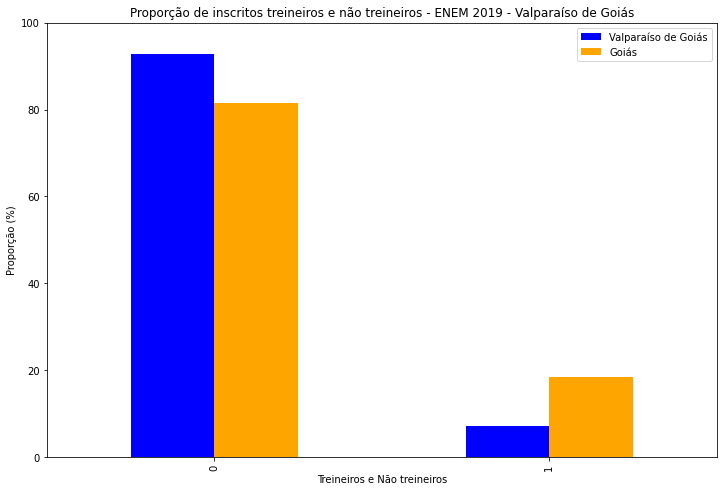

In [ ]:
#Observando a proporção de treineiros e não treineiros que fizeram a prova

treineiros_e_nao_treineiros = dados_valparaiso['IN_TREINEIRO'].value_counts(normalize = True) * 100
treineiros_e_nao_treineiros_goias = dados["IN_TREINEIRO"].value_counts(normalize = True) * 100

dados_treineiros = pd.DataFrame({"Valparaíso de Goiás": treineiros_e_nao_treineiros,
                                "Goiás":treineiros_e_nao_treineiros_goias})

#Plotando gráfico de barras dos treineiros e não treineiros em Valparaíso de Goiás
plt.figure(figsize=(10,8))
dados_treineiros.plot.bar(color = ["blue", "orange"], figsize=(12,8))
plt.xlabel("Treineiros e Não treineiros")
plt.ylabel("Proporção (%)")
plt.title("Proporção de inscritos treineiros e não treineiros - ENEM 2019 - Valparaíso de Goiás")
plt.ylim(0, 100)

#OBS: Não treineiros = 0 e treineiros = 1

[Text(0, 0.5, 'Nota Total'),
 [Text(0, 0, 'Não treineiros'), Text(0, 0, 'Treineiros')],
 Text(0.5, 0, 'Renda'),
 Text(0.5, 1.0, 'Comparação de notas Treineiros x Não treineiros - ENEM 2019 - Goiás')]

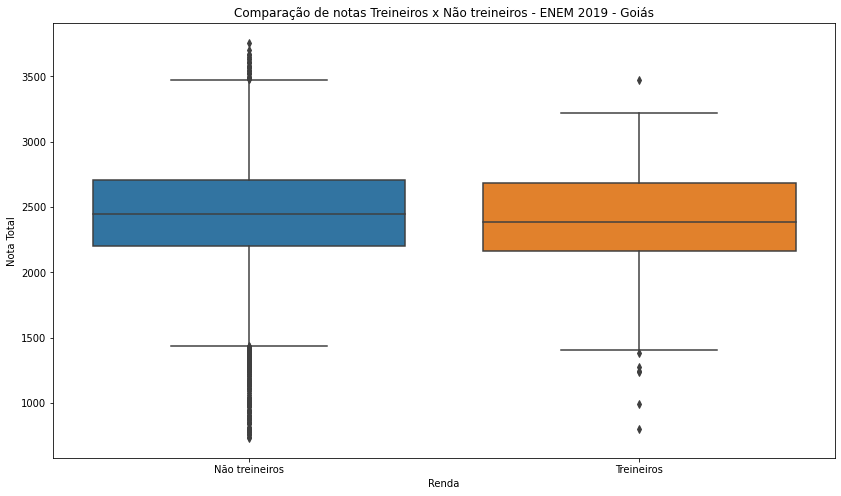

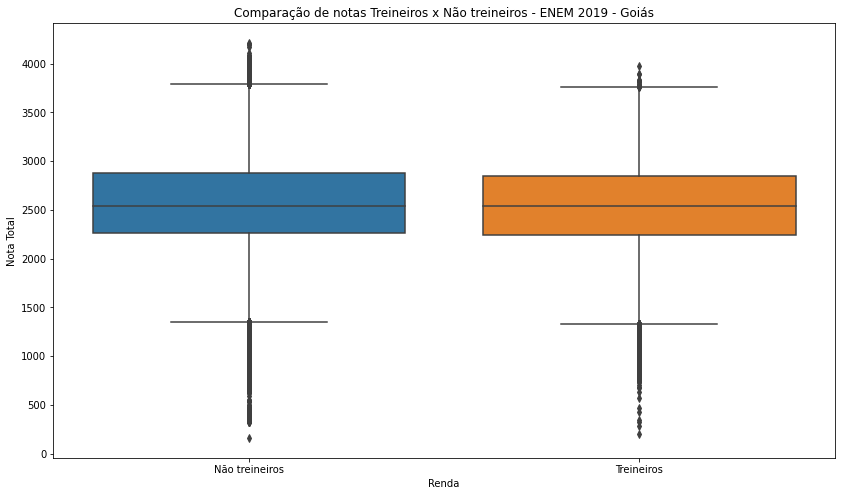

In [ ]:
dados_valparaiso_sem_zero = dados_valparaiso.query("NU_NOTA_TOTAL != 0")
dados_sem_zero = dados.query("NU_NOTA_TOTAL != 0")

#Boxplot dos treineiros e não treineiros de Valparaíso de Goiás
plt.figure(figsize=(14, 8))
boxplot_treineiros = sns.boxplot(x= "IN_TREINEIRO", y = "NU_NOTA_TOTAL", data = dados_valparaiso_sem_zero)
boxplot_treineiros.set(xlabel = "Renda", ylabel = "Nota Total", title = "Comparação de notas Treineiros x Não treineiros - ENEM 2019 - Goiás",
                       xticklabels=["Não treineiros", "Treineiros"])

#Boxplot dos treineiros e não treineiros de Goiás
plt.figure(figsize=(14, 8))
boxplot_treineiros = sns.boxplot(x= "IN_TREINEIRO", y = "NU_NOTA_TOTAL", data = dados_sem_zero)
boxplot_treineiros.set(xlabel = "Renda", ylabel = "Nota Total", title = "Comparação de notas Treineiros x Não treineiros - ENEM 2019 - Goiás",
                       xticklabels=["Não treineiros", "Treineiros"])

Dos 3,9 milhões de candidatos à prova do ENEM, 4812 estudantes foram de Valparaíso de Goiás. Tendo mais de 90% dos alunos como não treineiros e somente 7.2% como treineiros, sendo então pouquíssimos os alunos que se preparam para a prova anteriormente à conclusão do ensino médio comparado com o restante do estado de Goiás, podendo influenciar nas notas, já que, se um estudante possui um preparo maior, pressupõe-se que ele conseguirá ir melhor na prova nos anos seguintes. 

Observa-se também que os treineiros conseguem ir tão bem quanto os não treineiros, antes mesmo de concluir o 3 ano do ensino médio, portanto esses alunos devem ter uma propensão maior a ir melhor no ano seguinte, apesar de o ENEM não registrar em sua base de dados, se o aluno foi treineiro nos anos anteriores para maiores investigações.

## Análise exploratória - Renda

Text(0.5, 1.0, 'Proporção de alunos por renda - Valparaíso de Goiás x Goiá - ENEM 2019')

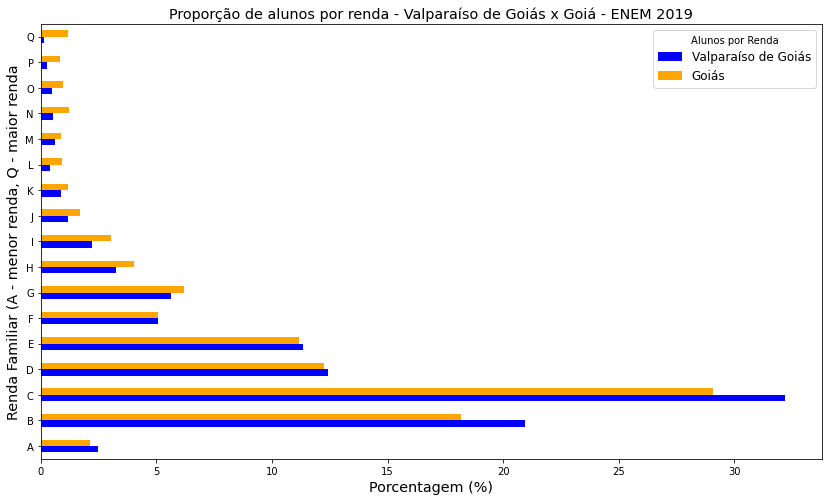

In [ ]:
#Separando estudantes pela renda em Valparaíso de Goiás e no estado de Goiás
renda_valparaiso = dados_valparaiso["Q006"].value_counts(normalize = True).sort_index() * 100
renda_goias = dados["Q006"].value_counts(normalize = True).sort_index() * 100

#Preparando dados para plotagem
dados_renda = pd.DataFrame({"Valparaíso de Goiás": renda_valparaiso,
                                "Goiás":renda_goias})

#Plotando renda pelo gráfico de barras horizontais de Valparaíso de Goiás
dados_renda.plot.barh(color=["Blue", "Orange"], figsize = (14,8))
plt.xlabel("Porcentagem (%)", fontsize="x-large")
plt.ylabel("Renda Familiar (A - menor renda, Q - maior renda", fontsize="x-large")
plt.legend(["Valparaíso de Goiás" , "Goiás"], title = "Alunos por Renda", fontsize = "large")
plt.title("Proporção de alunos por renda - Valparaíso de Goiás x Goiá - ENEM 2019", fontsize = "x-large")



[Text(0, 0.5, 'Nota Total'),
 Text(0.5, 0, 'Renda'),
 Text(0.5, 1.0, 'Comparação de notas por renda - ENEM 2019 - Goiás')]

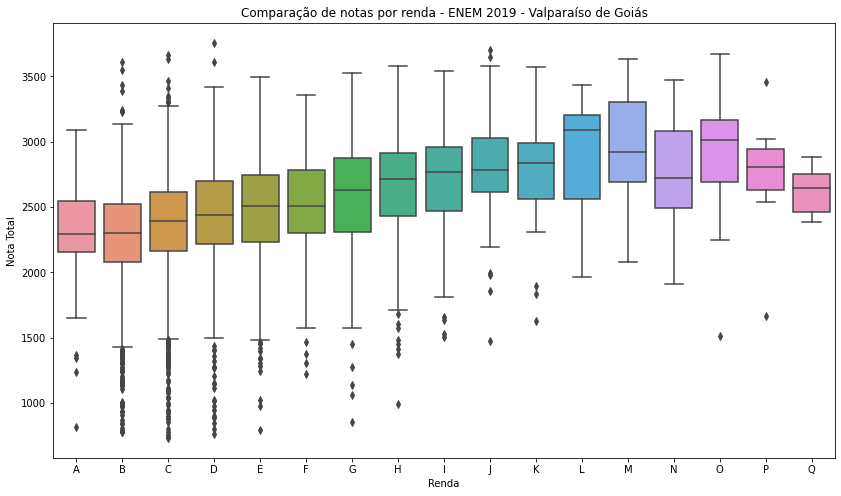

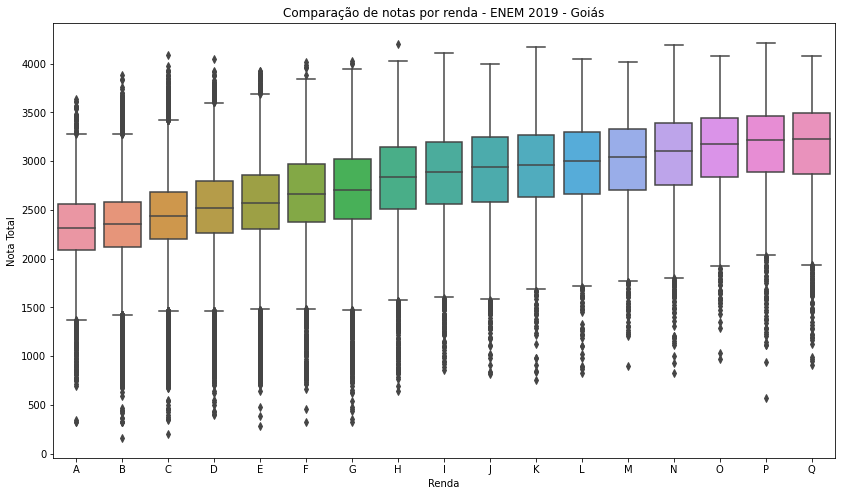

In [ ]:
#Ordenando a renda para ficar do menor para o maior
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

#Boxplot das notas por renda de Valparaíso de Goiás
plt.figure(figsize=(14,8))
boxplot_treineiros_valparaiso = sns.boxplot(x= "Q006", y = "NU_NOTA_TOTAL", data = dados_valparaiso_sem_zero, order = renda_ordenada)
boxplot_treineiros_valparaiso.set(xlabel = "Renda", ylabel = "Nota Total", title = "Comparação de notas por renda - ENEM 2019 - Valparaíso de Goiás")


#Boxplot das notas por renda de Goiás
plt.figure(figsize=(14,8))
boxplot_treineiros_goias = sns.boxplot(x= "Q006", y = "NU_NOTA_TOTAL", data = dados_sem_zero, order = renda_ordenada)
boxplot_treineiros_goias.set(xlabel = "Renda", ylabel = "Nota Total", title = "Comparação de notas por renda - ENEM 2019 - Goiás")


Olhando a proporção de renda em Valparaíso comparado com o estado de Goiás, é possível perceber que em média, a renda familiar do município é bem menor do que os alunos, o que pode impactar diretamente na nota, já que avaliando as notas pela renda no estado de Goiás, quanto maior a renda familiar, em geral, maior a nota total, sugerindo que o ensino público é muito pior que o ensino privado. Já que normalmente, alunos que tem renda familiar mais alta, tendem a ir para escolas particulares.

No entanto, o mesmo padrão não se segue em Valparaíso de Goiás, insinuando que mesmo com uma renda familiar muito acima do padrão, não se tem acesso a um ensino de qualidade para ir melhor na prova. No entanto, o número de amostras com renda familiar muito alta é muito baixo, não podendo fazer esta afirmação com absoluta certeza.

## Análise Exploratória - Cor/Raça

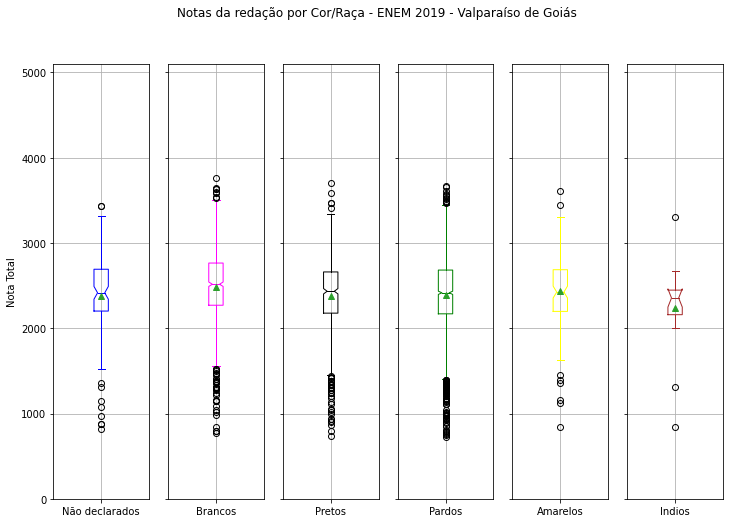

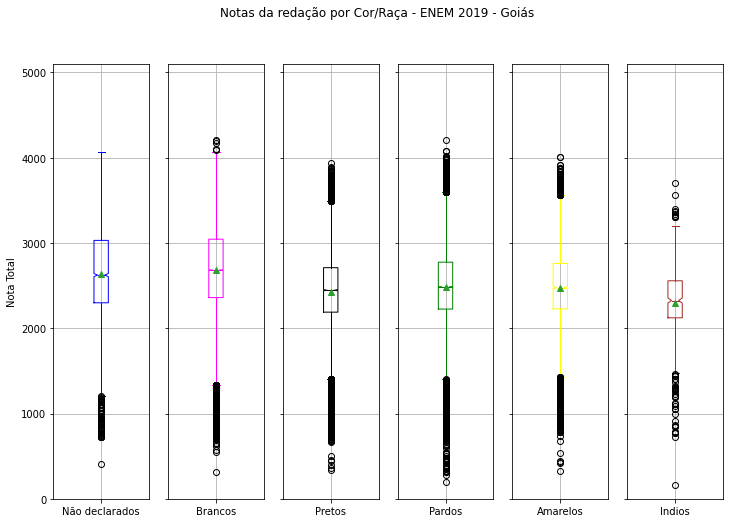

In [ ]:
#Fazendo Boxplot para comparar as notas dos inscritos pela cor/raça e renda familiar

#Declarando as cores/raças a serem avaliadas em Valparaíso de Goiás
notas_nao_declarados = dados_valparaiso_sem_zero.query("TP_COR_RACA == 0")["NU_NOTA_TOTAL"]
notas_brancos = dados_valparaiso_sem_zero.query("TP_COR_RACA == 1")["NU_NOTA_TOTAL"]
notas_pretos = dados_valparaiso_sem_zero.query("TP_COR_RACA == 2")["NU_NOTA_TOTAL"]
notas_pardos = dados_valparaiso_sem_zero.query("TP_COR_RACA == 3")["NU_NOTA_TOTAL"]
notas_amarelos = dados_valparaiso_sem_zero.query("TP_COR_RACA == 4")["NU_NOTA_TOTAL"]
notas_indios = dados_valparaiso_sem_zero.query("TP_COR_RACA == 5")["NU_NOTA_TOTAL"]

#Criando gráfico boxplot para Valparaíso de Goiás
fig, axes = plt.subplots(nrows=1,ncols=6,figsize=(12,8), sharey = True)


notas_nao_declarados.plot.box(ax = axes[0],subplots=True,title = "Notas da redação por Cor/Raça - ENEM 2019 - Valparaíso de Goiás", label="Não declarados",
                              grid = True, color = "blue", showmeans = True, notch=True, ylabel = "Nota Total") 
notas_brancos.plot.box(ax = axes[1],subplots=True, label = "Brancos", grid = True, color = "magenta", showmeans = True, notch=True)
notas_pretos.plot.box(ax = axes[2],subplots=True, label = "Pretos", grid = True, color = "black", showmeans = True, notch=True)
notas_pardos.plot.box(ax = axes[3],subplots=True, label = "Pardos", grid = True, color = "green", showmeans = True, notch=True)
notas_amarelos.plot.box(ax = axes[4],subplots=True, label = "Amarelos", grid = True, color = "yellow", showmeans = True, notch=True)
notas_indios.plot.box(ax = axes[5],subplots=True, label = "Indios", grid = True, color = "brown", showmeans = True, notch=True)
plt.ylim(0,5100)
plt.show()

#Declarando as cores/raças a serem avaliadas em Goiás
notas_nao_declarados_goias = dados_sem_zero.query("TP_COR_RACA == 0")["NU_NOTA_TOTAL"]
notas_brancos_goias = dados_sem_zero.query("TP_COR_RACA == 1")["NU_NOTA_TOTAL"]
notas_pretos_goias = dados_sem_zero.query("TP_COR_RACA == 2")["NU_NOTA_TOTAL"]
notas_pardos_goias = dados_sem_zero.query("TP_COR_RACA == 3")["NU_NOTA_TOTAL"]
notas_amarelos_goias = dados_sem_zero.query("TP_COR_RACA == 4")["NU_NOTA_TOTAL"]
notas_indios_goias = dados_sem_zero.query("TP_COR_RACA == 5")["NU_NOTA_TOTAL"]


#Criando gráfico boxplot para Goiás
fig, axes = plt.subplots(nrows=1,ncols=6,figsize=(12,8), sharey = True)


notas_nao_declarados_goias.plot.box(ax = axes[0],subplots=True,title = "Notas da redação por Cor/Raça - ENEM 2019 - Goiás", label="Não declarados",
                                    grid = True, color = "blue", showmeans = True, notch=True, ylabel = "Nota Total") 
notas_brancos_goias.plot.box(ax = axes[1],subplots=True, label = "Brancos", grid = True, color = "magenta", showmeans = True, notch=True)
notas_pretos_goias.plot.box(ax = axes[2],subplots=True, label = "Pretos", grid = True, color = "black", showmeans = True, notch=True)
notas_pardos_goias.plot.box(ax = axes[3],subplots=True, label = "Pardos", grid = True, color = "green", showmeans = True, notch=True)
notas_amarelos_goias.plot.box(ax = axes[4],subplots=True, label = "Amarelos", grid = True, color = "yellow", showmeans = True, notch=True)
notas_indios_goias.plot.box(ax = axes[5],subplots=True, label = "Indios", grid = True, color = "brown", showmeans = True, notch=True)
plt.ylim(0,5100)

plt.show()

<Figure size 1008x576 with 0 Axes>

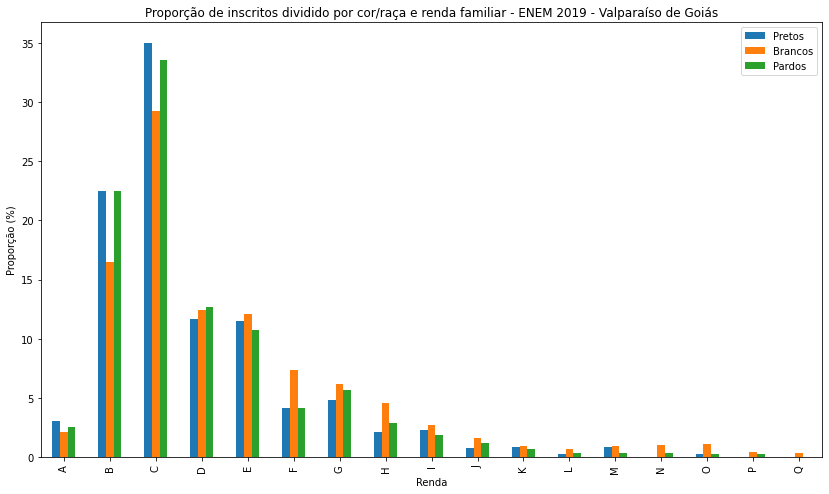

<Figure size 1008x576 with 0 Axes>

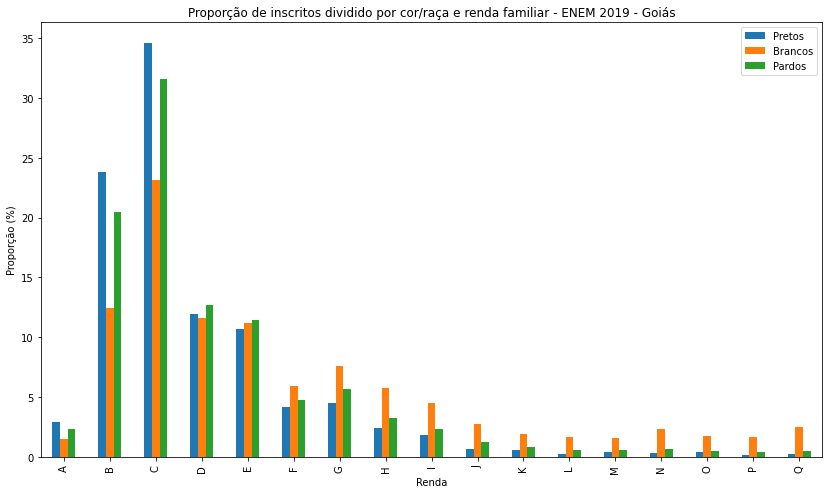

In [ ]:
#Criando variáveis para analisar quantidade de alunos por cor/raça em Valparaíso de Goiás
renda_pretos = dados_valparaiso.query("TP_COR_RACA == 2")["Q006"].value_counts(normalize = True) * 100
renda_brancos = dados_valparaiso.query("TP_COR_RACA == 1")["Q006"].value_counts(normalize = True) * 100
renda_pardos = dados_valparaiso.query("TP_COR_RACA == 3")["Q006"].value_counts(normalize = True) * 100

#Preparando os dados para criar o gráfico de barras
renda_cor = pd.DataFrame({"Pretos":renda_pretos, "Brancos":renda_brancos, "Pardos":renda_pardos})

#Criando o gráfico de barras
plt.figure(figsize=(14,8))
renda_cor.plot.bar(figsize=(14,8))
plt.xlabel("Renda")
plt.ylabel("Proporção (%)")
plt.title("Proporção de inscritos dividido por cor/raça e renda familiar - ENEM 2019 - Valparaíso de Goiás")

plt.savefig("renda_vs_cor_val.png")

#Criando variáveis para analisar quantidade de alunos por cor/raça em Goiás
renda_pretos_goias = dados.query("TP_COR_RACA == 2")["Q006"].value_counts(normalize = True) * 100
renda_brancos_goias = dados.query("TP_COR_RACA == 1")["Q006"].value_counts(normalize = True) * 100
renda_pardos_goias = dados.query("TP_COR_RACA == 3")["Q006"].value_counts(normalize = True) * 100

#Preparando os dados para criar o gráfico de barras
renda_cor_goias = pd.DataFrame({"Pretos":renda_pretos_goias, "Brancos":renda_brancos_goias, "Pardos":renda_pardos_goias})

#Criando o gráfico de barras
plt.figure(figsize=(14,8))
renda_cor_goias.plot.bar(figsize=(14,8))
plt.xlabel("Renda")
plt.ylabel("Proporção (%)")
plt.title("Proporção de inscritos dividido por cor/raça e renda familiar - ENEM 2019 - Goiás")
plt.savefig("renda_vs_cor_go.png")

Observando o gráfico e fazendo uma comparação de notas entre Valparaíso de Goiás e o restante do estado, é visível que a média de notas é menor do que a média do estado. 

Além disso, é possível visualizar que existe desigualdade social entre cores e raças, sendo que prevalece a cor branca nas rendas mais altas, enquanto prevalece a cor poreta nas rendas mais baixas. 

Isto é um indicativo que ainda existe discriminação entre as cores, e o acesso a educação dos pretos é pior do que quando comparado aos brancos e pardos.

## Distribuições e Correlações - Notas

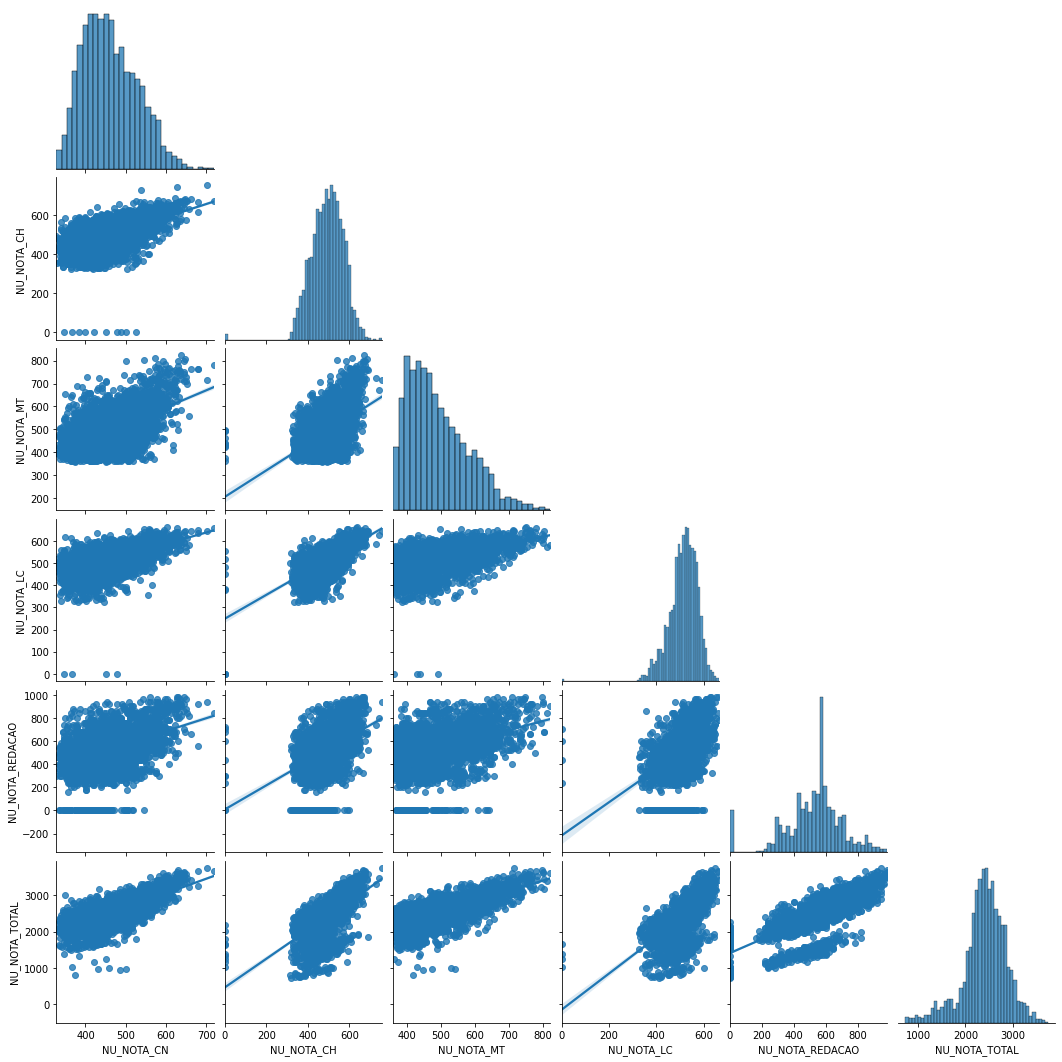

In [ ]:
#Regplot das notas de Valparaíso de Goiás
sns.pairplot(dados_valparaiso_sem_zero[provas], kind="reg", corner=True)

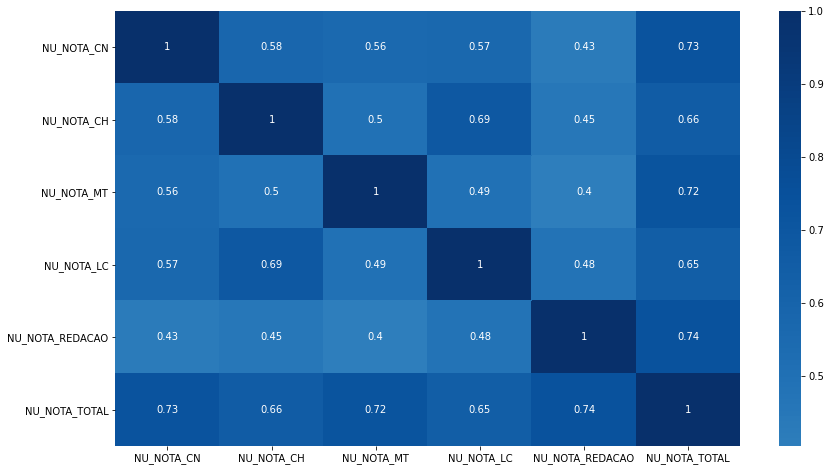

In [ ]:
#Correlação entre as notas dos inscritos de Valparaíso de Goiás
correlacao = dados_valparaiso_sem_zero[provas].corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True) 

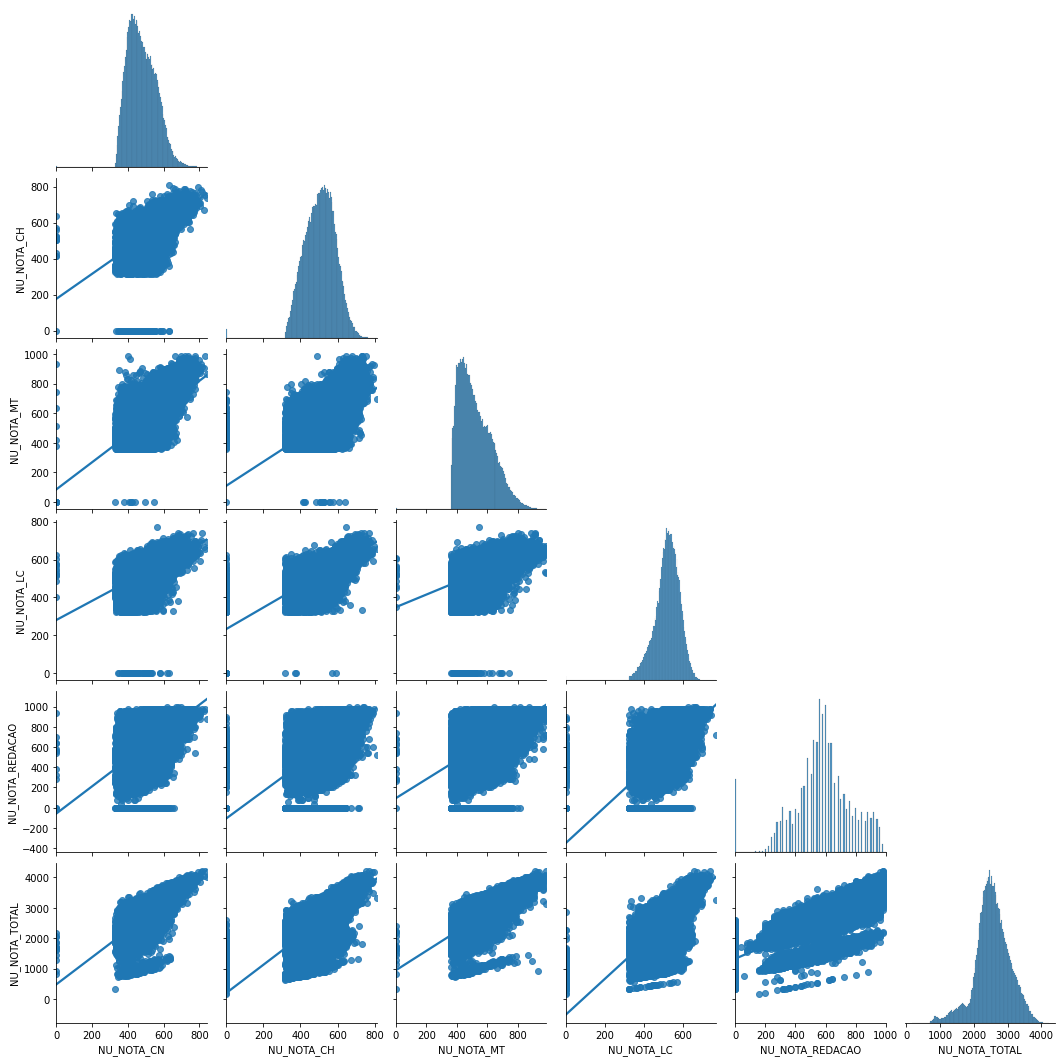

In [ ]:
#Regplot das notas do estado de Goiás
sns.pairplot(dados_sem_zero[provas], kind="reg", corner=True)

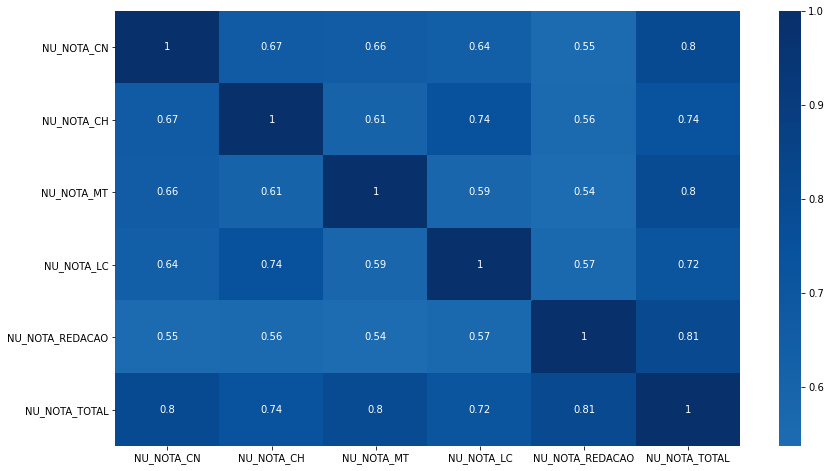

In [ ]:
#Correlação entre as notas dos inscritos de Goiás
correlacao_goias = dados_sem_zero[provas].corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlacao_goias, cmap="Blues", center=0, annot=True)

Diferentemente da amostra analisada na aula de imersão de dados da Alura, as notas que demonstraram a correlação mais forte foi entre as provas de Ciências Humanas e de Linguagens e Códigos, tanto em Valparaíso de Goiás, como no restante do estado.

Pode-se inferir que os alunos que costumam ter um bom aproveitamento na prova de Ciências Humanas tendem a ter um melhor rendimento na prova de Linguagens e Códigos, e vice-versa. 

No entanto, aparentemente o ensino de matemática está menos relacionado com a performance dos alunos de Goiás em geral nas outras matérias, porém alunos que vão bem em Matemática, tem maior tendência a tirar uma nota melhor na prova como um todo.

Apesar de tudo, as correlações não são muito fortes, não podendo chegar a muitas conclusões a partir delas.

## Conclusão

Analisando todos os dados relacionados ao ENEM 2019 e comparando com o restante do estado, é possível concluir que Valparaíso de Goiás está mais atrasado tanto no âmbito educacional quanto financeiro em relação aos estudantes de ensino médio.

O município aparenta estar bem servido de professores para o ensino médio, já que a média é de 1 professor para 14 alunos matriculados no ensino médio. Uma das justificativas para este déficit na educação, mesmo tendo um número razoável de docentes, pode-se explicar pelo apoio que o município/estado dá para estes professores, já que a média salarial é muito menor do que comparado ao Distrito Federal, por exemplo, chegando ao professor municipal ganhar por volta de R$15,00/hora. (1, 5)

Como dito na introdução, Valparaíso de Goiás é uma cidade que está localizada a poucos kilômetros de Brasília. Lá um professor da Secretaria da Educação do Distrito Federal (SEDF) tem como salário inicial R$5000,00 por mês, o equivalente a 125 reais por hora. Por conta disso, existe a evasão de vários professores para o Distrito Federal, e normalmente, os professores que moram em Valparaíso que trabalham no Distrito Federam, possuem uma capacidade técnica melhor, deixando o município com um déficit de profissionais melhores qualificados para ensinar no município. (6)

Além dos professores não terem um incentivo tão grande, os alunos de Valparaíso de Goiás também possuem uma renda familiar, no geral, mais baixa do que no restante do estado. Tendo mais alunos com uma renda menor que R$1497,00, e, por conta disso, aparentemente não tem um acesso à um ensino de melhor qualidade. Ademais, famílias com essa renda, tendem a não ter um nível de educação alto e um padrão de vida mais difícil, portanto, essas famílias não conseguem apoiar o estudante para que ele tenha um desempenho melhor na prova.

Não parece haver uma cultura de preparação para a prova do ENEM em Valparaíso, já que a quantidade de alunos treineiros é menor que 8% dos inscritos no ENEM, enquanto que no estado de Goiás, os treineiros chegam a representar aproximadamente 20% dos inscritos. Desta maneira, é natural que as notas não consigam acompanhar o restante do estado, visto que os inscritos não tem uma ideia de como está o conhecimento para a prova, e também não sabe as melhores estratégias para o exame. 

Como as notas dos alunos de Valparaíso de Goiás é mais baixo do que no restante do estado, as chances de conseguirem acesso à uma universidade pública, ou conseguir uma bolsa em uma universidade particular (por meio dos programas públicos), é menor. Com isso, os estudantes podem se desestimular a continuar estudando no ensino superior, já que a renda familiar não consegue arcar com uma faculdade particular, e, quando consegue, normalmente o aluno tem que trabalhar enquanto estuda para conseguir contribuir fincanceiramente na família.

Finalizando, Valparaíso de Goiás é uma cidade com um potencial incrível de crescimento e desenvolvimento pela sua proximidade com a capital do Brasil, no entanto, para melhor aproveitar o investimento, o município precisa investir mais em sua educação básica, já que pelo menos no ensino médio, foi demonstrado que a educação é inferior ao restante do estado de Goiás, e o ENEM 2019 é uma boa métrica para entender como estão os estudantes que conseguem concluir o ensino médio e ingressar no ensino superior, o que pode contribuir para o aspecto financeiro da cidade, já que com profissionais mais qualificados, existe uma maior movimentação de dinheiro e o surgimento de empresas que não sejam focadas apenas no comércio puro.

Espero que estes estudos sejam suficientes para abrir os olhos da população e da prefeitura para investir mais na educação dos seus habitantes, e promova assim, movimentações para o melhor crescimento do município.





## Fontes

1 - https://cidades.ibge.gov.br/brasil/go/valparaiso-de-goias/panorama 

2 - https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem

3 - http://ideb.inep.gov.br/resultado/resultado/resultado.seam?cid=1640342

4 - https://pronatec.pro.br/qual-e-a-idade-certa-para-terminar-o-ensino-medio/#:~:text=O%20Minist%C3%A9rio%20da%20Educa%C3%A7%C3%A3o%20(MEC,para%20terminar%20o%20Ensino%20M%C3%A9dio.

5 - https://www.opopular.com.br/noticias/cidades/professores-de-89-munic%C3%ADpios-de-goi%C3%A1s-recebem-menos-que-o-piso-1.1531489

6 - https://blog.grancursosonline.com.br/concurso-sedf-salario/#:~:text=Concurso%20SEDF%3A%20821%20professores%20ser%C3%A3o%20empossados%20este%20ano&text=Estes%2C%20ser%C3%A3o%20empossados%20assim%20que,%2C%20R%24%2010.000%2C00.